<a href="https://colab.research.google.com/github/AmitC04/E-commerce-Predictions/blob/main/Ecommerce_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as  pd
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pickle
import os


In [2]:

data = pd.read_excel("/content/customer_data.xlsx")

In [3]:
data

customer_id   age  gender  annual_income  last_visited_days_ago  \
0               1  56.0    male            NaN                    7.0   
1               2  69.0  female        47617.0                    4.0   
2               3  46.0    male        94258.0                   30.0   
3               4  32.0  female        70075.0                   19.0   
4               5  60.0    male       146998.0                   16.0   
...           ...   ...     ...            ...                    ...   
9995         9996  58.0    male        98348.0                   15.0   
9996         9997  23.0  female       176408.0                   21.0   
9997         9998  41.0  female       134892.0                   30.0   
9998         9999  44.0    male        65952.0                   17.0   
9999        10000  37.0  female       115996.0                   10.0   

      session_duration  pages_visited   device  purchase  
0                 17.0           15.0  desktop         0  
1                 35.0           19.0   mobile         0  
2                  NaN           15.0   mobile         0  
3                  4.0           12.0   mobile         0  
4                 51.0            NaN   mobile         0  
...                ...            ...      ...       ...  
9995               6.0            9.0  desktop         1  
9996              48.0           11.0   tablet         0  
9997              58.0            5.0  desktop         0  
9998              41.0           11.0   tablet         1  
9999              58.0           13.0   tablet         0  

[10000 rows x 9 columns]

In [4]:

data.head()

customer_id   age  gender  annual_income  last_visited_days_ago  \
0            1  56.0    male            NaN                    7.0   
1            2  69.0  female        47617.0                    4.0   
2            3  46.0    male        94258.0                   30.0   
3            4  32.0  female        70075.0                   19.0   
4            5  60.0    male       146998.0                   16.0   

   session_duration  pages_visited   device  purchase  
0              17.0           15.0  desktop         0  
1              35.0           19.0   mobile         0  
2               NaN           15.0   mobile         0  
3               4.0           12.0   mobile         0  
4              51.0            NaN   mobile         0

In [5]:
data.tail()

customer_id   age  gender  annual_income  last_visited_days_ago  \
9995         9996  58.0    male        98348.0                   15.0   
9996         9997  23.0  female       176408.0                   21.0   
9997         9998  41.0  female       134892.0                   30.0   
9998         9999  44.0    male        65952.0                   17.0   
9999        10000  37.0  female       115996.0                   10.0   

      session_duration  pages_visited   device  purchase  
9995               6.0            9.0  desktop         1  
9996              48.0           11.0   tablet         0  
9997              58.0            5.0  desktop         0  
9998              41.0           11.0   tablet         1  
9999              58.0           13.0   tablet         0

In [6]:

data["device"].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [7]:

data.isnull().sum()

customer_id                 0
age                      1000
gender                   1000
annual_income            1000
last_visited_days_ago    1000
session_duration         1000
pages_visited            1000
device                      0
purchase                    0
dtype: int64

In [8]:
data.describe()

customer_id          age  annual_income  last_visited_days_ago  \
count  10000.00000  9000.000000    9000.000000            9000.000000   
mean    5000.50000    44.109333  109628.591111              15.018111   
std     2886.89568    15.220279   51990.151925               8.906810   
min        1.00000    18.000000   20016.000000               0.000000   
25%     2500.75000    31.000000   64318.500000               7.000000   
50%     5000.50000    44.000000  110326.500000              15.000000   
75%     7500.25000    57.000000  154725.250000              23.000000   
max    10000.00000    70.000000  199971.000000              30.000000   

       session_duration  pages_visited      purchase  
count       9000.000000    9000.000000  10000.000000  
mean          30.818111      10.457556      0.303100  
std           17.280978       5.757072      0.459621  
min            1.000000       1.000000      0.000000  
25%           16.000000       6.000000      0.000000  
50%           31.000000      10.000000      0.000000  
75%           46.000000      15.000000      1.000000  
max           60.000000      20.000000      1.000000

In [9]:

data.shape

(10000, 9)

In [10]:

data.size


90000

In [11]:
data.columns.tolist()

['customer_id',
 'age',
 'gender',
 'annual_income',
 'last_visited_days_ago',
 'session_duration',
 'pages_visited',
 'device',
 'purchase']

In [12]:
data.nunique()

customer_id              10000
age                         53
gender                       2
annual_income             8788
last_visited_days_ago       31
session_duration            60
pages_visited               20
device                       3
purchase                     2
dtype: int64

In [13]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  int64  
 1   age                    9000 non-null   float64
 2   gender                 9000 non-null   object 
 3   annual_income          9000 non-null   float64
 4   last_visited_days_ago  9000 non-null   float64
 5   session_duration       9000 non-null   float64
 6   pages_visited          9000 non-null   float64
 7   device                 10000 non-null  object 
 8   purchase               10000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 703.2+ KB


In [14]:

data.isnull().sum().values.sum()

6000

In [16]:
data.corr(numeric_only=True)['purchase'][:-1]

customer_id             -0.008155
age                     -0.004813
annual_income            0.001957
last_visited_days_ago   -0.022300
session_duration         0.017301
pages_visited           -0.006521
Name: purchase, dtype: float64

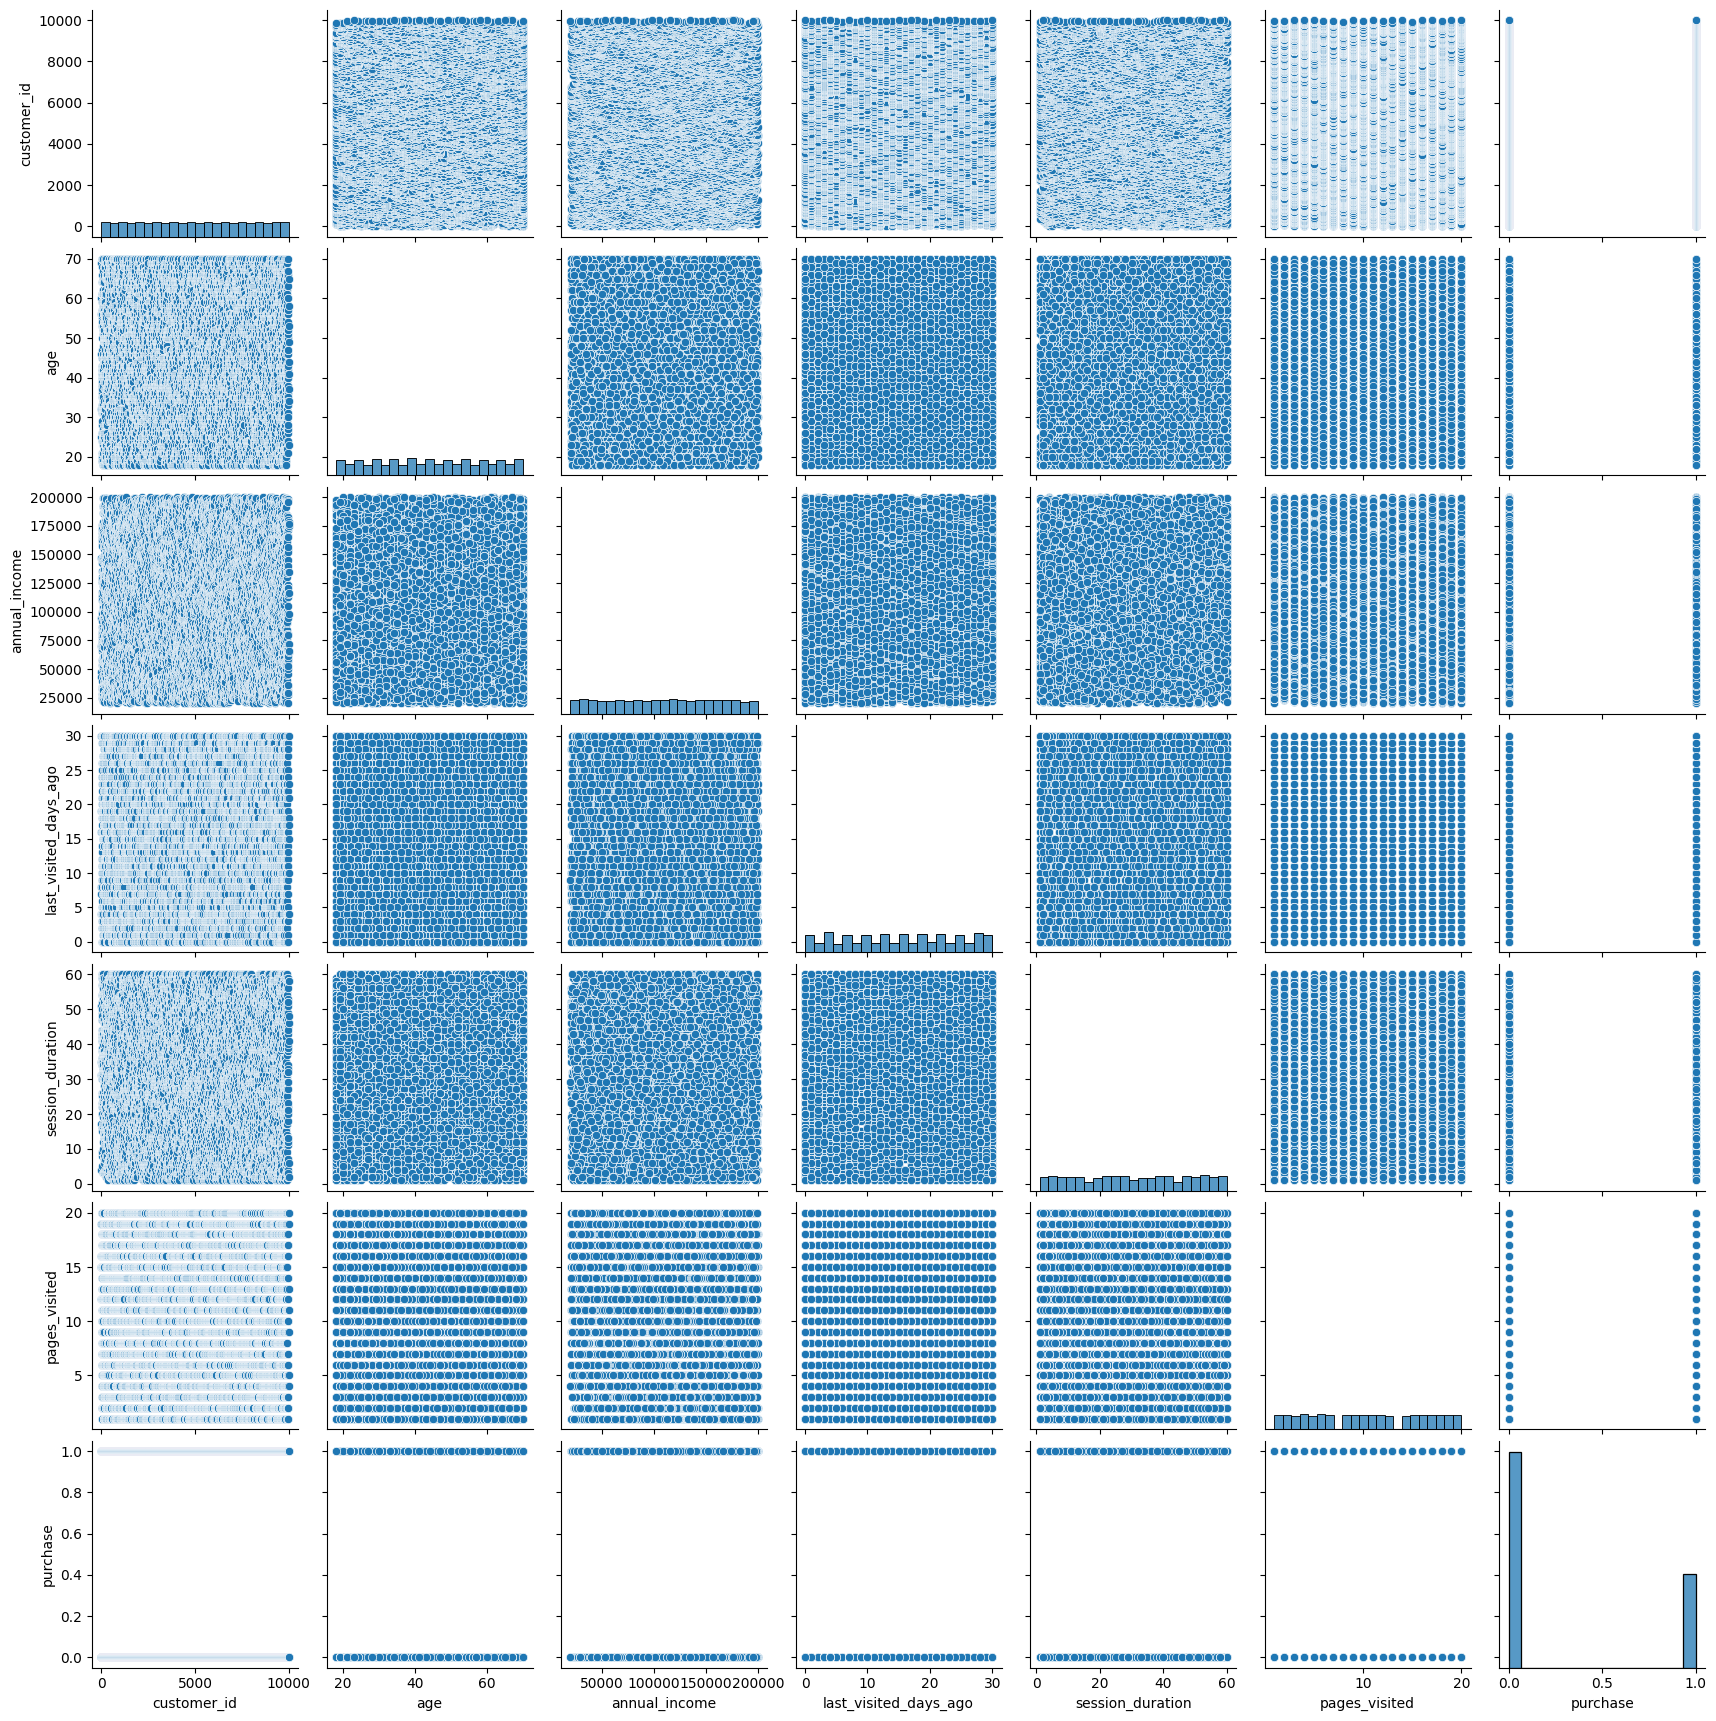

In [17]:

sns.pairplot(data)
plt.show()

In [18]:

data = data.dropna()

In [19]:

data.shape

(5373, 9)

In [20]:

data.dtypes

customer_id                int64
age                      float64
gender                    object
annual_income            float64
last_visited_days_ago    float64
session_duration         float64
pages_visited            float64
device                    object
purchase                   int64
dtype: object

In [21]:

data_obj = data.select_dtypes(object)
# prints a dictionary of max 10 unique values for each non-numeric column
pprint({ c : data_obj[c].unique()[:10] for c in data_obj.columns})



{'device': array(['mobile', 'desktop', 'tablet'], dtype=object),
 'gender': array(['female', 'male'], dtype=object)}


In [23]:
data = data.drop('customer_id', axis = 1)


In [24]:
data.head()

age  gender  annual_income  last_visited_days_ago  session_duration  \
1  69.0  female        47617.0                    4.0              35.0   
3  32.0  female        70075.0                   19.0               4.0   
5  25.0    male        42631.0                    8.0              31.0   
7  56.0    male       117158.0                   24.0               9.0   
8  36.0  female       158955.0                   12.0              31.0   

   pages_visited   device  purchase  
1           19.0   mobile         0  
3           12.0   mobile         0  
5           16.0  desktop         1  
7           20.0   tablet         0  
8           15.0  desktop         0

Min age: 18.0
Max age: 70.0


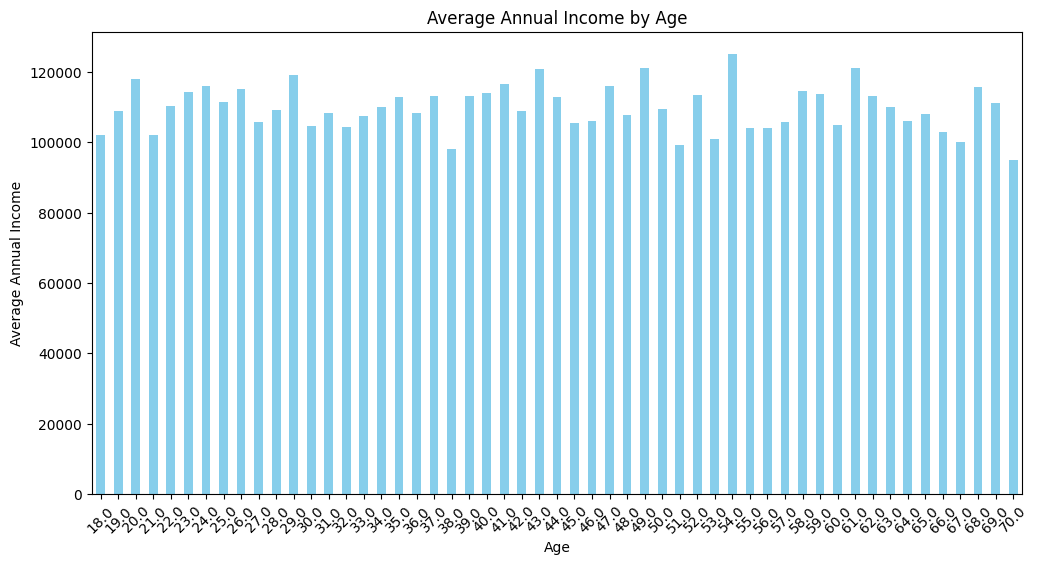

In [29]:
import matplotlib.pyplot as plt

# Ensure the dataset is loaded correctly
print(f"Min age: {data['age'].min()}")
print(f"Max age: {data['age'].max()}")

# Copy the dataset for modification
data_age = data.copy()

# Group by age and calculate the mean of annual income for each age
age_grouped = data_age.groupby("age")["annual_income"].mean()

# Plot the average annual income by age
age_grouped.plot(kind="bar", figsize=(12, 6), color="skyblue", xlabel='Age', ylabel="Average Annual Income", title="Average Annual Income by Age")
plt.xticks(rotation=45)
plt.show()


In [31]:
data["Days"] = data['last_visited_days_ago']

In [32]:
corr = data.corr(numeric_only=True)
print(corr)

                            age  annual_income  last_visited_days_ago  \
age                    1.000000      -0.014040               0.009320   
annual_income         -0.014040       1.000000              -0.004322   
last_visited_days_ago  0.009320      -0.004322               1.000000   
session_duration       0.018717      -0.011359              -0.018072   
pages_visited         -0.009418      -0.009891              -0.010026   
purchase              -0.003668      -0.000948              -0.033270   
Days                   0.009320      -0.004322               1.000000   

                       session_duration  pages_visited  purchase      Days  
age                            0.018717      -0.009418 -0.003668  0.009320  
annual_income                 -0.011359      -0.009891 -0.000948 -0.004322  
last_visited_days_ago         -0.018072      -0.010026 -0.033270  1.000000  
session_duration               1.000000      -0.010494  0.012579 -0.018072  
pages_visited                 

In [33]:
data = data.drop(['Days'], axis=1)

In [34]:
print(data.head())

    age  gender  annual_income  last_visited_days_ago  session_duration  \
1  69.0  female        47617.0                    4.0              35.0   
3  32.0  female        70075.0                   19.0               4.0   
5  25.0    male        42631.0                    8.0              31.0   
7  56.0    male       117158.0                   24.0               9.0   
8  36.0  female       158955.0                   12.0              31.0   

   pages_visited   device  purchase  
1           19.0   mobile         0  
3           12.0   mobile         0  
5           16.0  desktop         1  
7           20.0   tablet         0  
8           15.0  desktop         0  


In [35]:
cat_columns = data.select_dtypes(include=['object']).columns

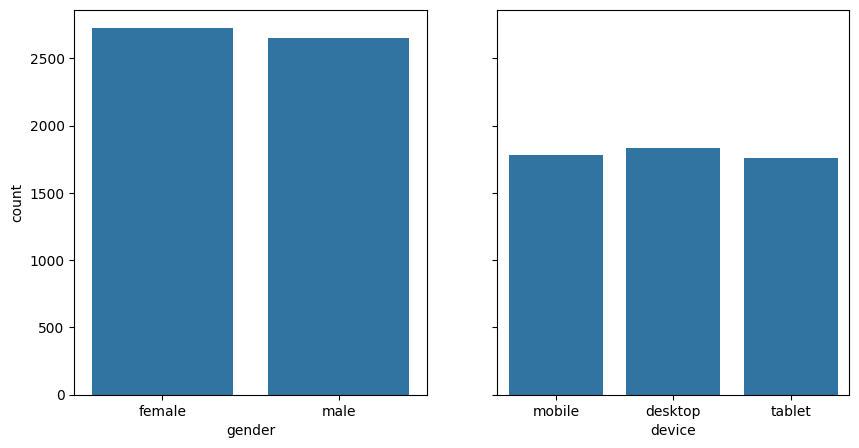

In [36]:
# Plot count plots for each categorical column
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5))
for i, c in enumerate(cat_columns):
    sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

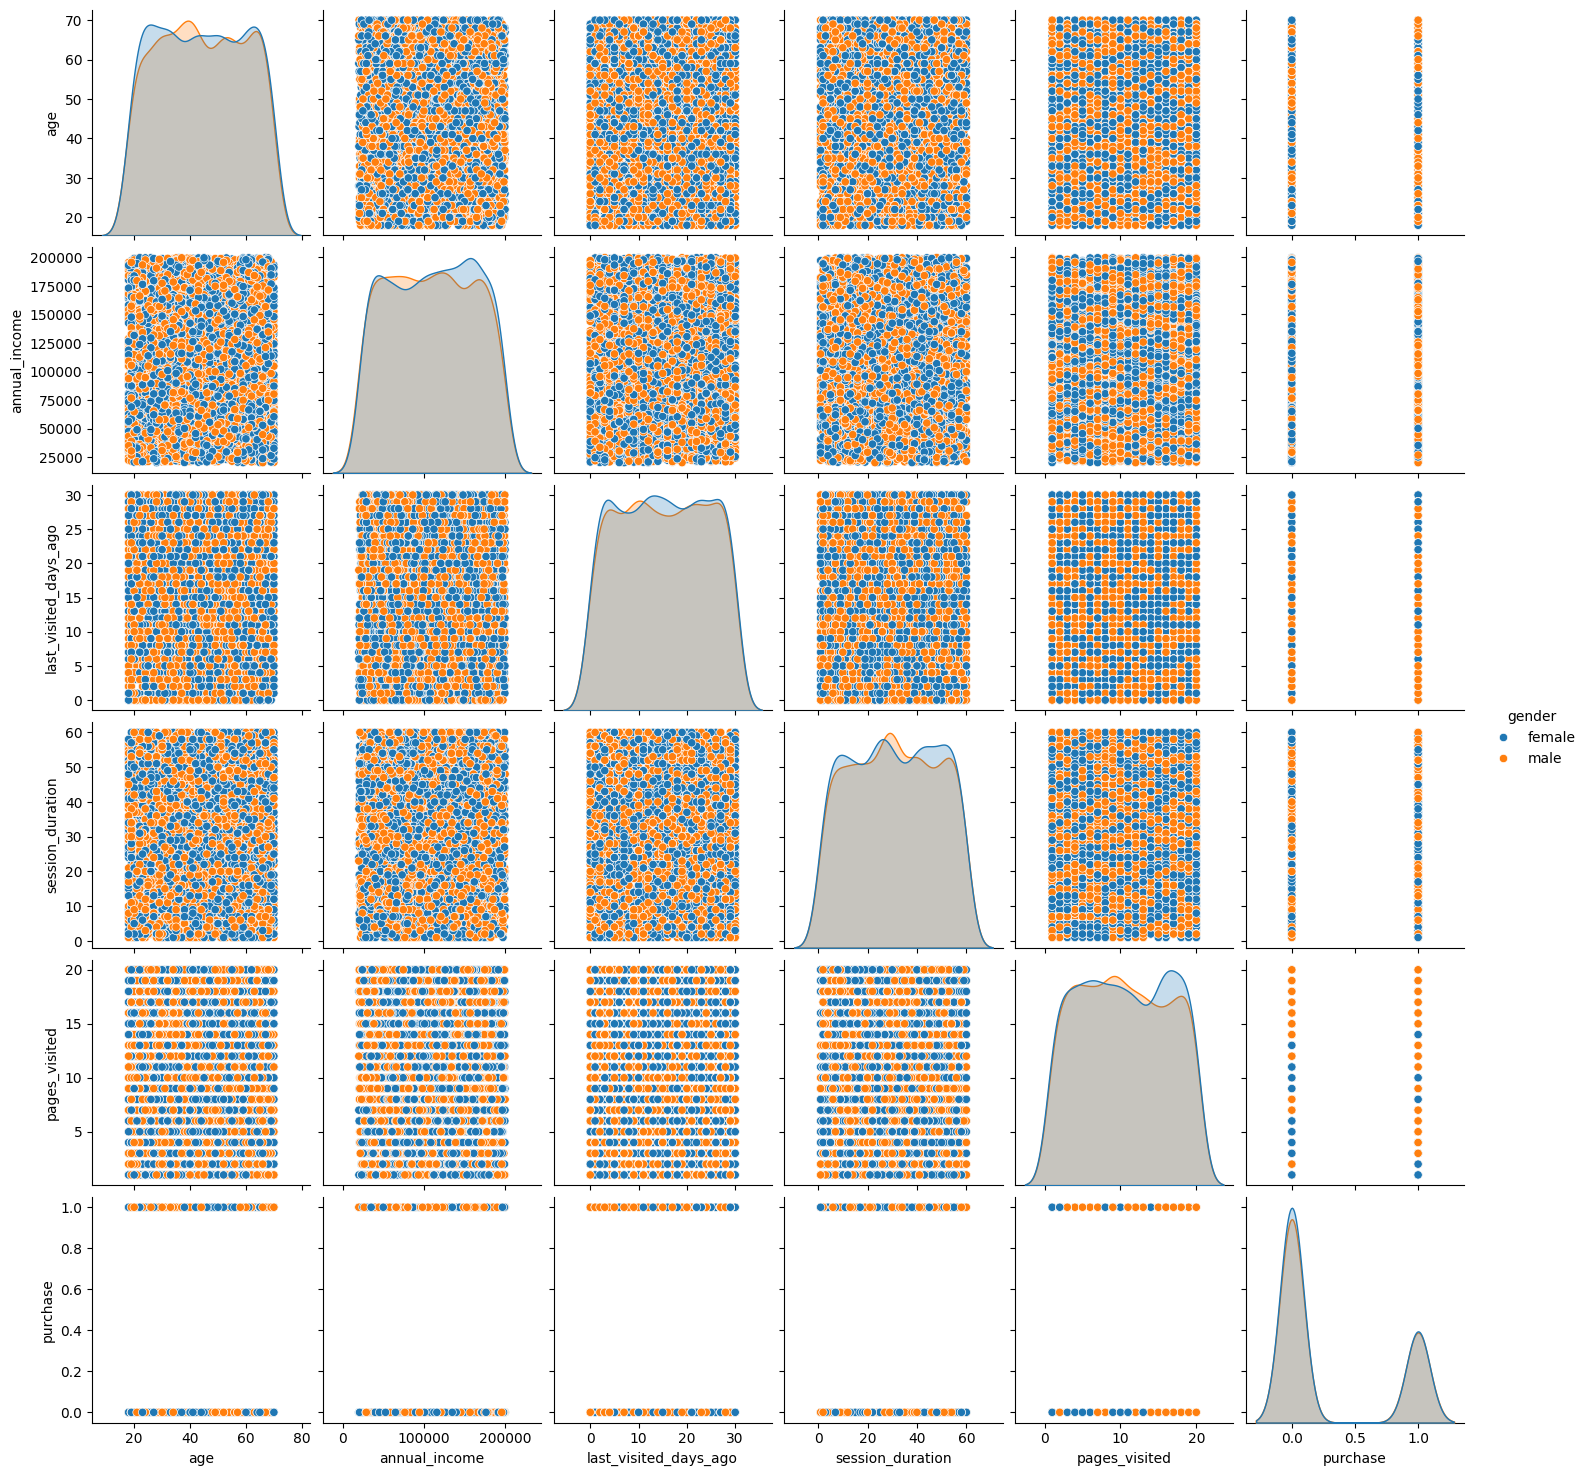

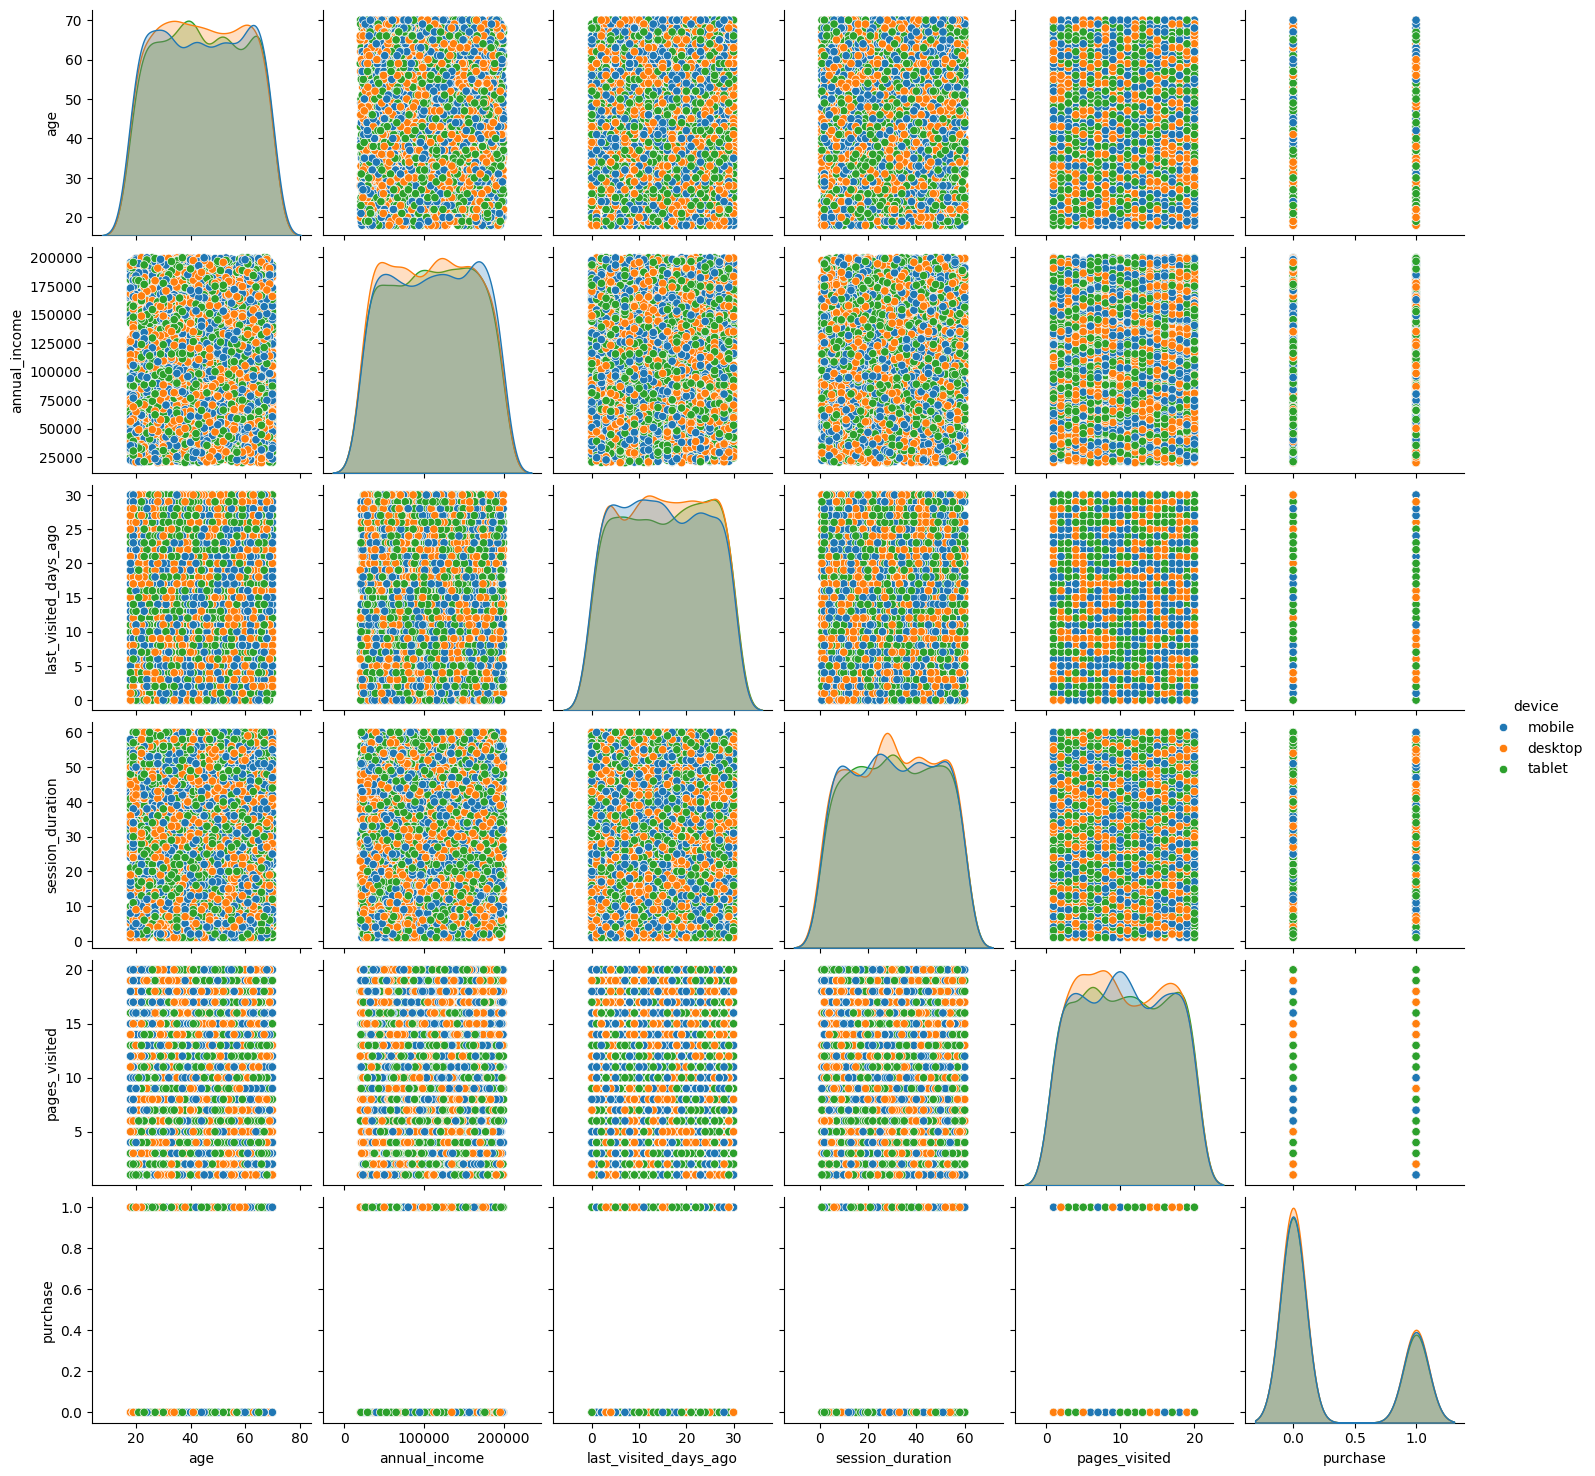

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through categorical columns and generate pairplot for each
for c in data.select_dtypes(include=['object']).columns:
    if len(data.select_dtypes(include=['number']).columns) > 1:  # Check if there are multiple numerical columns
        sns.pairplot(data, hue=c, vars=data.select_dtypes(include=['number']).columns)
        plt.show()


In [38]:
data = pd.get_dummies(data, columns=['gender', 'device'], drop_first=True)
print(data.head())

    age  annual_income  last_visited_days_ago  session_duration  \
1  69.0        47617.0                    4.0              35.0   
3  32.0        70075.0                   19.0               4.0   
5  25.0        42631.0                    8.0              31.0   
7  56.0       117158.0                   24.0               9.0   
8  36.0       158955.0                   12.0              31.0   

   pages_visited  purchase  gender_male  device_mobile  device_tablet  
1           19.0         0        False           True          False  
3           12.0         0        False           True          False  
5           16.0         1         True          False          False  
7           20.0         0         True          False           True  
8           15.0         0        False          False          False  


In [39]:
y = data['purchase']  # Assuming 'purchase' is the target column
X = data.drop('purchase', axis=1)  # All other columns are features

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [41]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [42]:
# Save the scaler to a file
scaler_filename = '../models/scaler.pkl'
os.makedirs(os.path.dirname(scaler_filename), exist_ok=True)

with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [43]:
# Save the processed data
path = '../data/processed/'
os.makedirs(path, exist_ok=True)

X_train.to_csv(path + 'X_train_processed.csv', index=False)
y_train.to_csv(path + 'y_train_processed.csv', index=False)


In [44]:
# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

In [45]:
# Train the model
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Linear Regression Model Performance Metrics
print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

Linear Regression Model Performance Metrics:



In [47]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.21532227128336967


In [48]:
# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.46402830870903733


In [49]:
# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.4235481477657685


In [50]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: -0.0008754301783835405


In [51]:
import pickle
import os
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the feature names for reference
feature_names = X.columns.tolist()
print("Feature Names:", feature_names)

# Save the Linear Regression Model to a file
model_filename = '../models/linear_regression.pkl'
os.makedirs(os.path.dirname(model_filename), exist_ok=True)
with open(model_filename, 'wb') as model_file:
    pickle.dump(linear_regression_model, model_file)

# Create and fit the LinearSVR model (SVM with linear kernel)
SVMLinear = LinearSVR(dual='auto', max_iter=10000)  # max_iter can be adjusted
SVMLinear.fit(X_train, y_train)

# Support Vector Machine (Linear Kernel) Performance Metrics
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")
y_pred = SVMLinear.predict(X_test)

# Calculate performance metrics for SVM Linear
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Fit and evaluate the Support Vector Machine with RBF kernel (SVR)
SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

# Support Vector Machine (RBF Kernel) Performance Metrics
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")
y_pred = SVMRbf.predict(X_test)

# Calculate performance metrics for SVR
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Fit and evaluate the Random Forest Regressor
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

# Random Forest Performance Metrics
print("Random Forest Performance Metrics\n")
y_pred = RandomForest.predict(X_test)

# Calculate performance metrics for Random Forest
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Feature Names: ['age', 'annual_income', 'last_visited_days_ago', 'session_duration', 'pages_visited', 'gender_male', 'device_mobile', 'device_tablet']
Support Vector Machine (Linear Kernel) Performance Metrics

Mean Squared Error: 0.31327543424320353
Root Mean Squared Error: 0.5597101341258737
Mean Absolute Error: 0.31327543424379367
R-squared Score: -0.456187895212413
Support Vector Machine (RBF Kernel) Performance Metrics

Mean Squared Error: 0.2586181604186484
Root Mean Squared Error: 0.5085451409842083
Mean Absolute Error: 0.35250912882847474
R-squared Score: -0.20212628734679638
Random Forest Performance Metrics

Mean Squared Error: 0.22756966501240697
Root Mean Squared Error: 0.47704262389477
Mean Absolute Error: 0.42994416873449126
R-squared Score: -0.05780458754818607
